In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder,PowerTransformer
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold,RFE,SelectFromModel

import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [2]:
df=pd.read_csv(r'../input/breast-cancer-dataset/breast-cancer.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.drop('id',inplace=True,axis=1) # Dropping id column

In [5]:
df.dtypes # checking data types of all the columns

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.groupby('diagnosis').describe().reset_index()

diagnosis radius_mean                                                      \
                  count       mean       std     min     25%     50%    75%   
0         B       357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   
1         M       212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   

         texture_mean                                                      \
     max        count       mean       std    min      25%    50%     75%   
0  17.85        357.0  17.914762  3.995125   9.71  15.1500  17.39  19.760   
1  28.11        212.0  21.604906  3.779470  10.38  19.3275  21.46  23.765   

         perimeter_mean                                                \
     max          count        mean        std    min     25%     50%   
0  33.81          357.0   78.075406  11.807438  43.79  70.870   78.18   
1  39.28          212.0  115.365377  21.854653  71.90  98.745  114.20   

                  area_mean                                               \
       75%    max     count        mean         std    min    25%    50%   
0   86.100  114.6     357.0  462.790196  134.287118  143.5  378.2  458.4   
1  129.925  188.5     212.0  978.376415  367.937978  361.6  705.3  932.0   

                   smoothness_mean                                        \
       75%     max           count      mean       std      min      25%   
0   551.10   992.1           357.0  0.092478  0.013446  0.05263  0.08306   
1  1203.75  2501.0           212.0  0.102898  0.012608  0.07371  0.09401   

                             compactness_mean                               \
       50%       75%     max            count      mean       std      min   
0  0.09076  0.100700  0.1634            357.0  0.080085  0.033750  0.01938   
1  0.10220  0.110925  0.1447            212.0  0.145188  0.053987  0.04605   

                                     concavity_mean                      \
       25%      50%      75%     max          count      mean       std   
0  0.05562  0.07529  0.09755  0.2239          357.0  0.046058  0.043442   
1  0.10960  0.13235  0.17240  0.3454          212.0  0.160775  0.075019   

                                               concave points_mean            \
       min       25%      50%      75%     max               count      mean   
0  0.00000  0.020310  0.03709  0.05999  0.4108               357.0  0.025717   
1  0.02398  0.109525  0.15135  0.20305  0.4268               212.0  0.087990   

                                                          symmetry_mean  \
        std      min      25%      50%       75%      max         count   
0  0.015909  0.00000  0.01502  0.02344  0.032510  0.08534         357.0   
1  0.034374  0.02031  0.06462  0.08628  0.103175  0.20120         212.0   

                                                                 \
       mean       std     min      25%     50%      75%     max   
0  0.174186  0.024807  0.1060  0.15800  0.1714  0.18900  0.2743   
1  0.192909  0.027638  0.1308  0.17405  0.1899  0.20985  0.3040   

  fractal_dimension_mean                                                   \
                   count      mean       std      min       25%       50%   
0                  357.0  0.062867  0.006747  0.05185  0.058530  0.061540   
1                  212.0  0.062680  0.007573  0.04996  0.056598  0.061575   

                     radius_se                                                \
        75%      max     count      mean       std     min       25%     50%   
0  0.065760  0.09575     357.0  0.284082  0.112570  0.1115  0.207300  0.2575   
1  0.067075  0.09744     212.0  0.609083  0.345039  0.1938  0.390375  0.5472   

                  texture_se                                                \
      75%     max      count      mean       std     min       25%     50%   
0  0.3416  0.8811      357.0  1.220380  0.589180  0.3602  0.795900  1.1080   
1  0.7573  2.8730      212.0  1.210915  0.483178  0.3621  0.892825  1.1025   

                  perimet

In [8]:
df1=df.copy()

### EDA

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


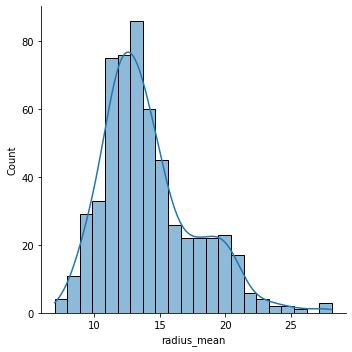

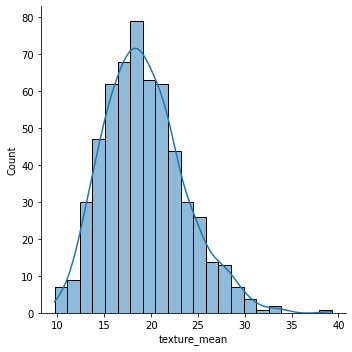

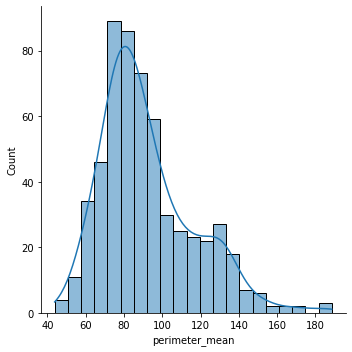

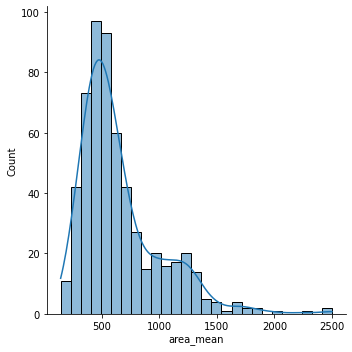

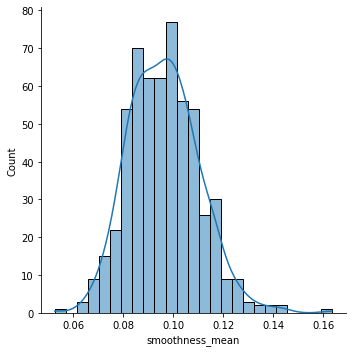

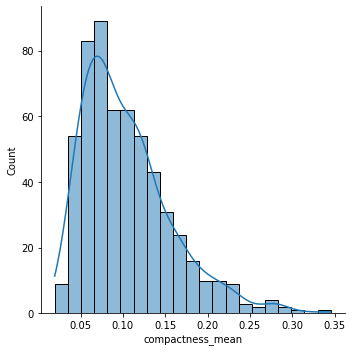

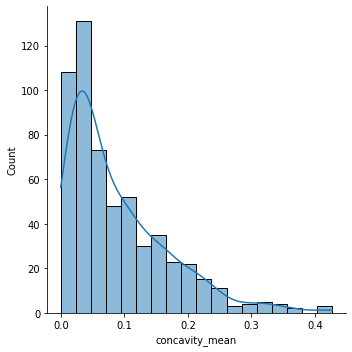

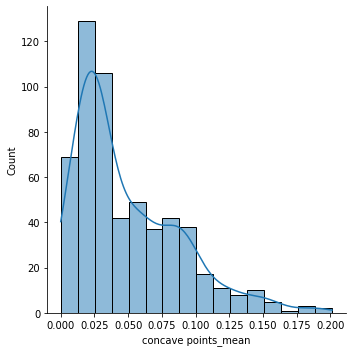

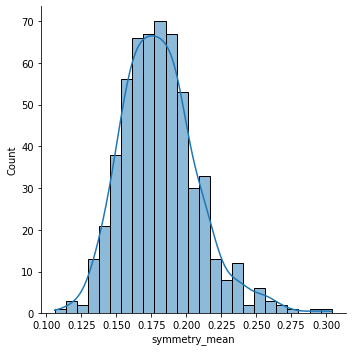

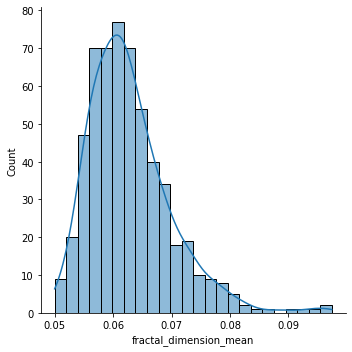

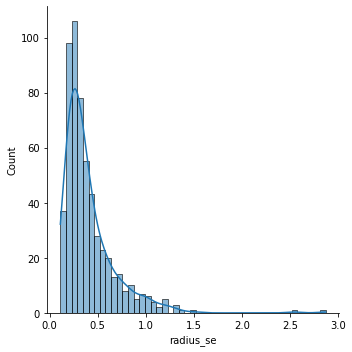

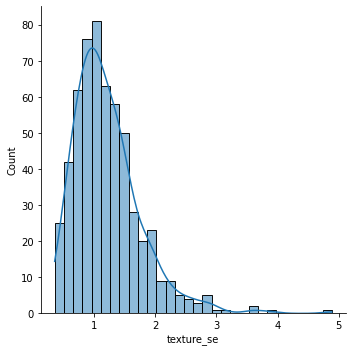

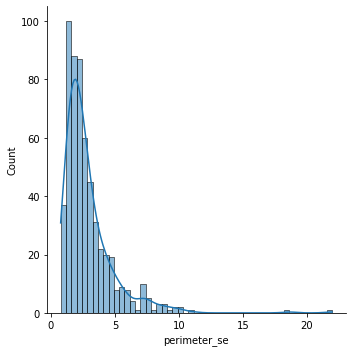

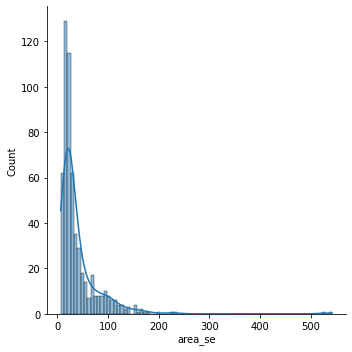

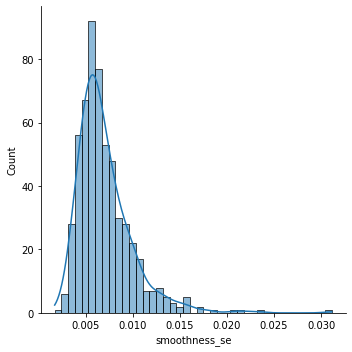

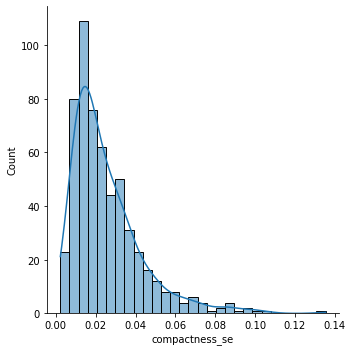

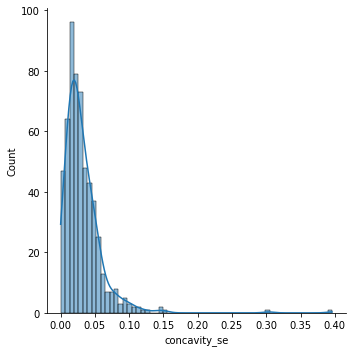

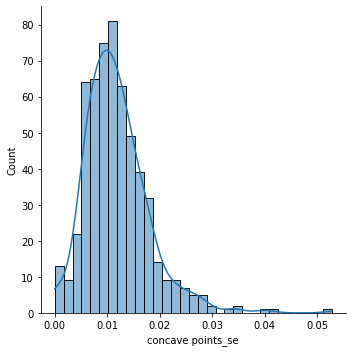

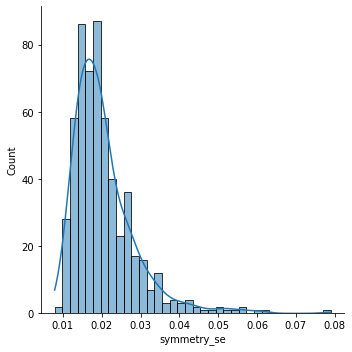

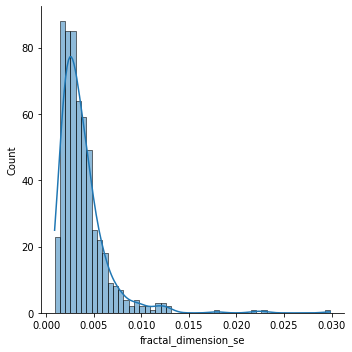

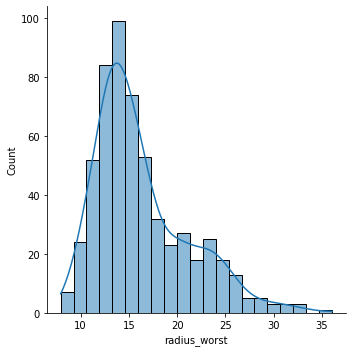

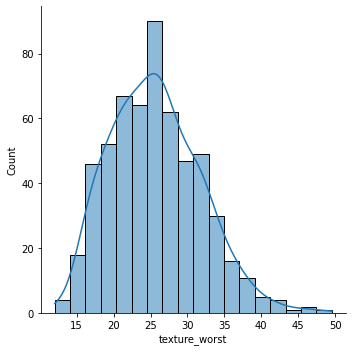

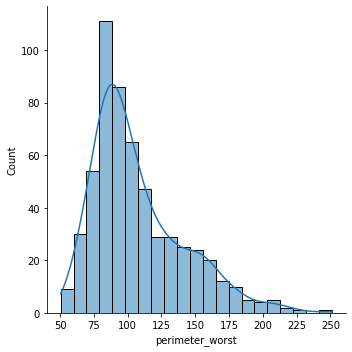

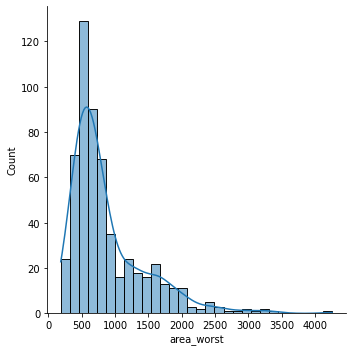

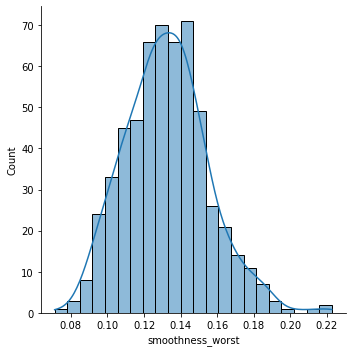

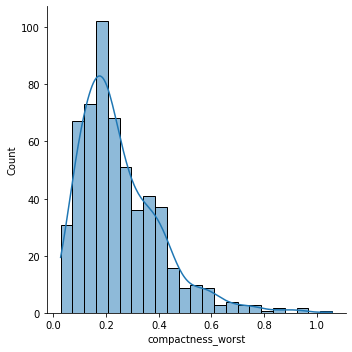

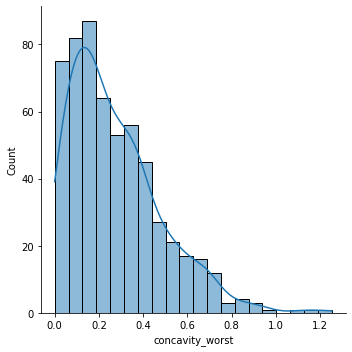

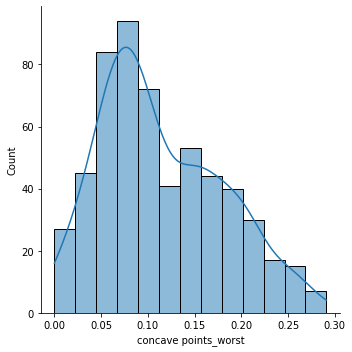

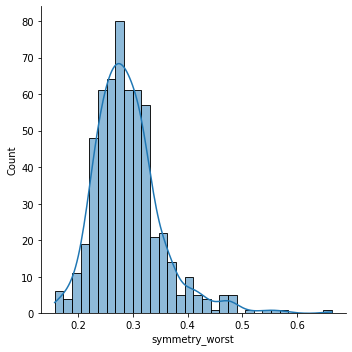

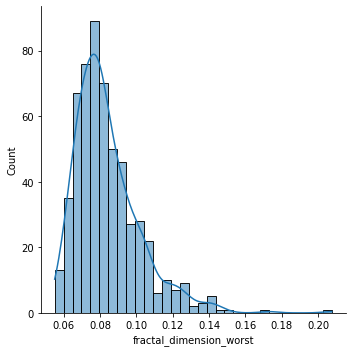

In [9]:
# univariate Analysis
for i in df.columns:
    if i!='diagnosis':
        sns.displot(data=df, x=i, kde=True)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


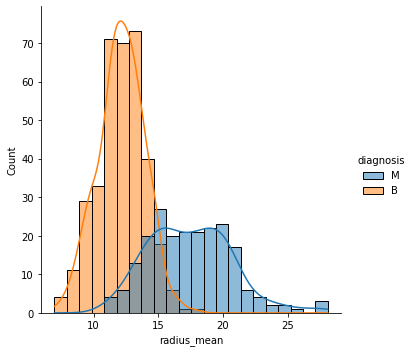

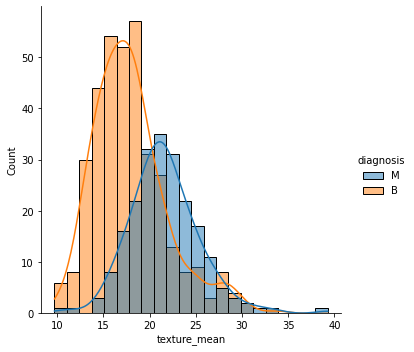

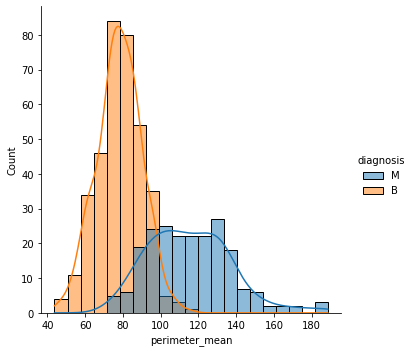

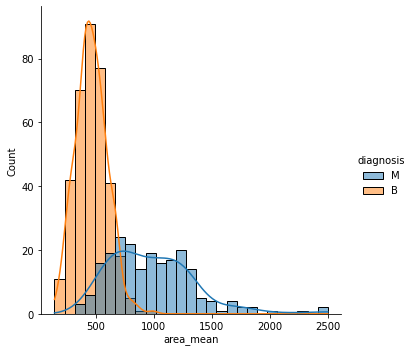

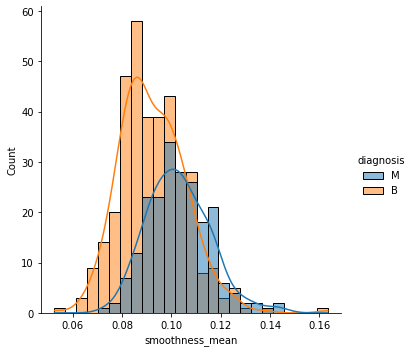

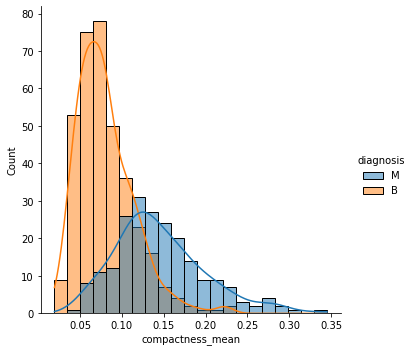

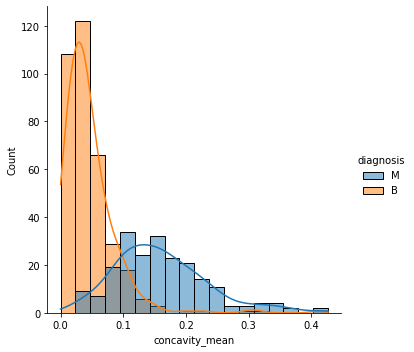

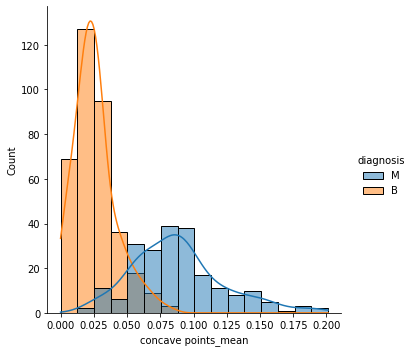

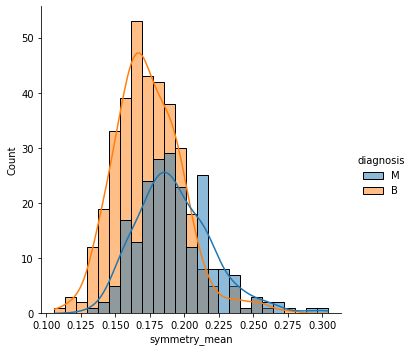

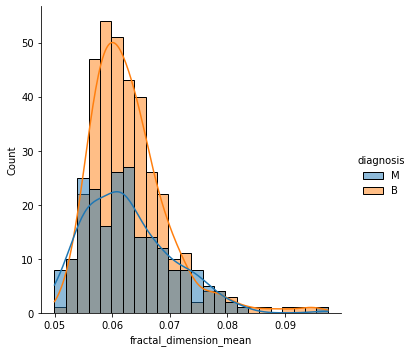

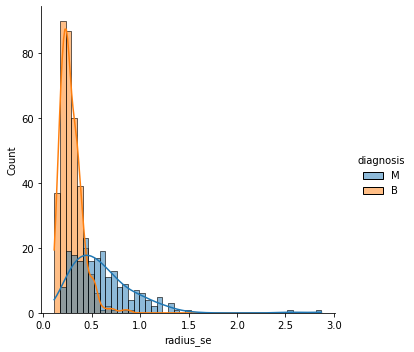

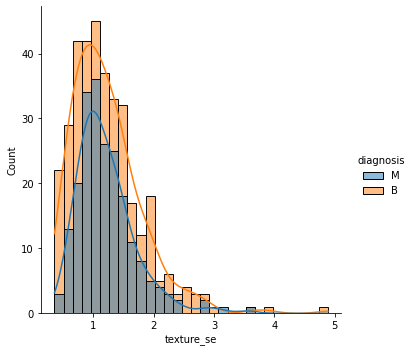

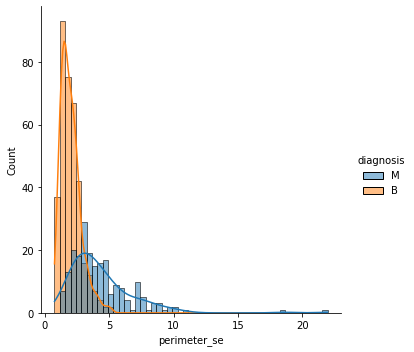

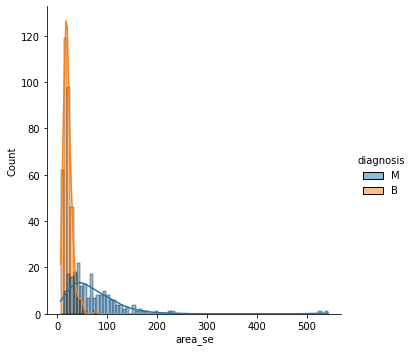

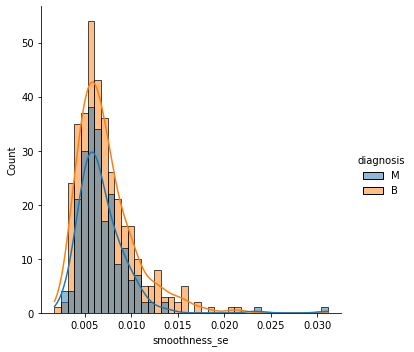

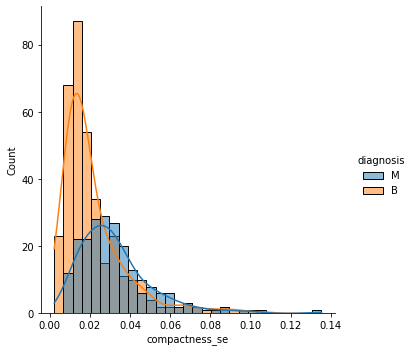

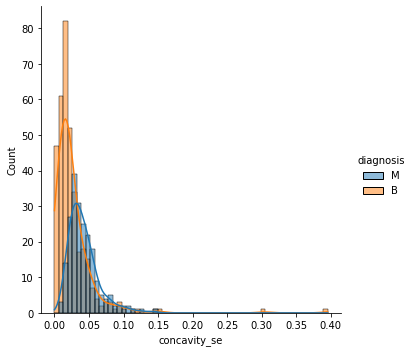

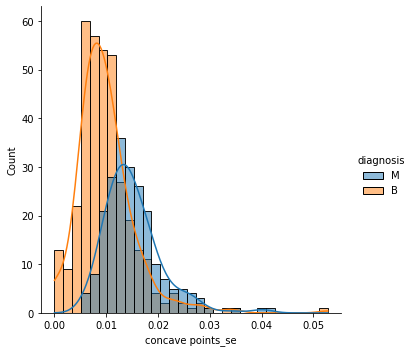

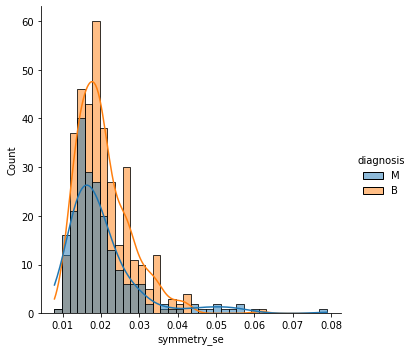

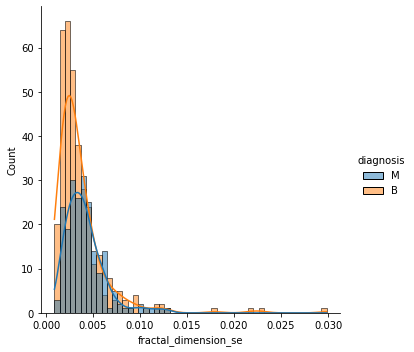

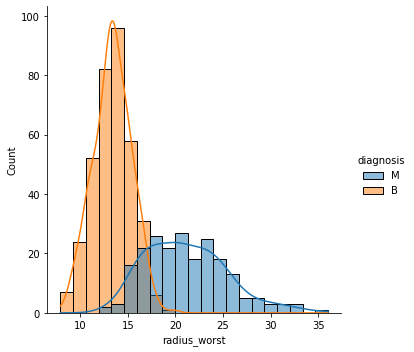

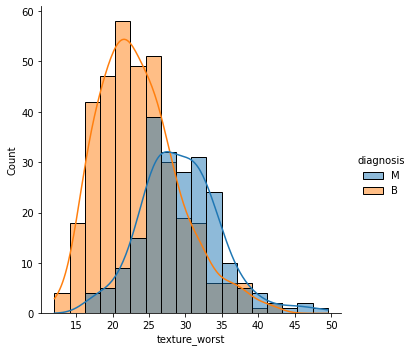

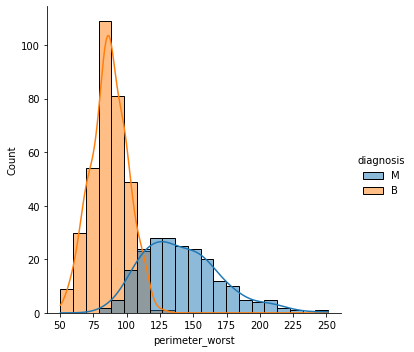

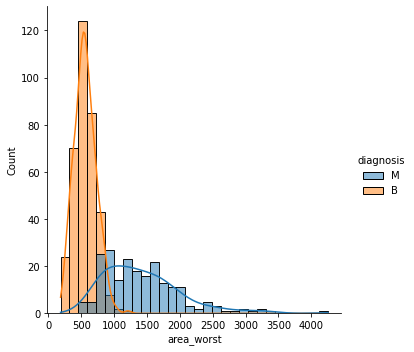

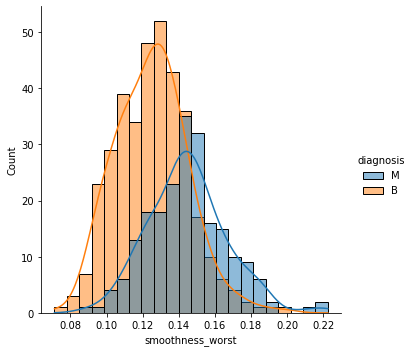

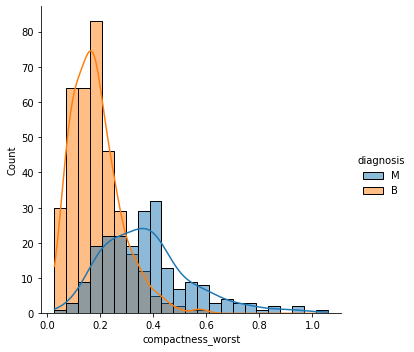

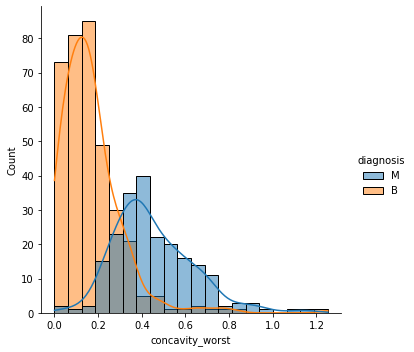

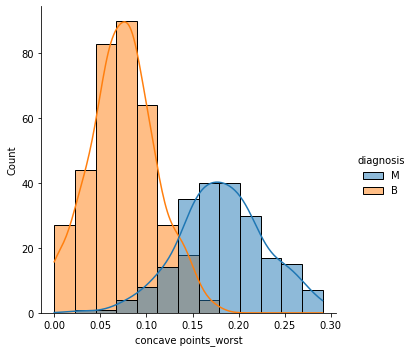

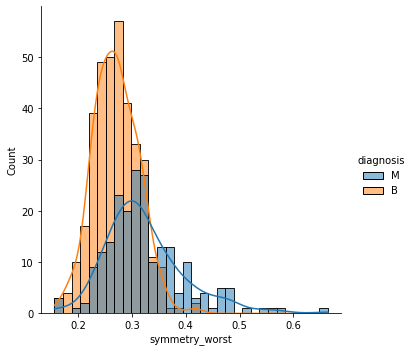

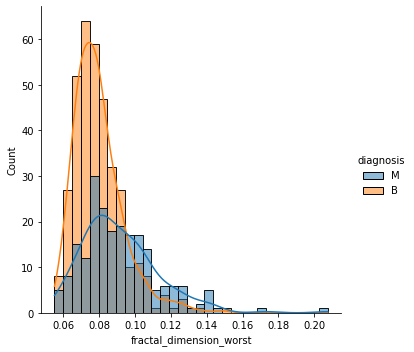

In [10]:
#with respect to diagnosis
for i in df.columns:
    if i!='diagnosis':
        sns.displot(data=df, x=i, kde=True,hue='diagnosis')

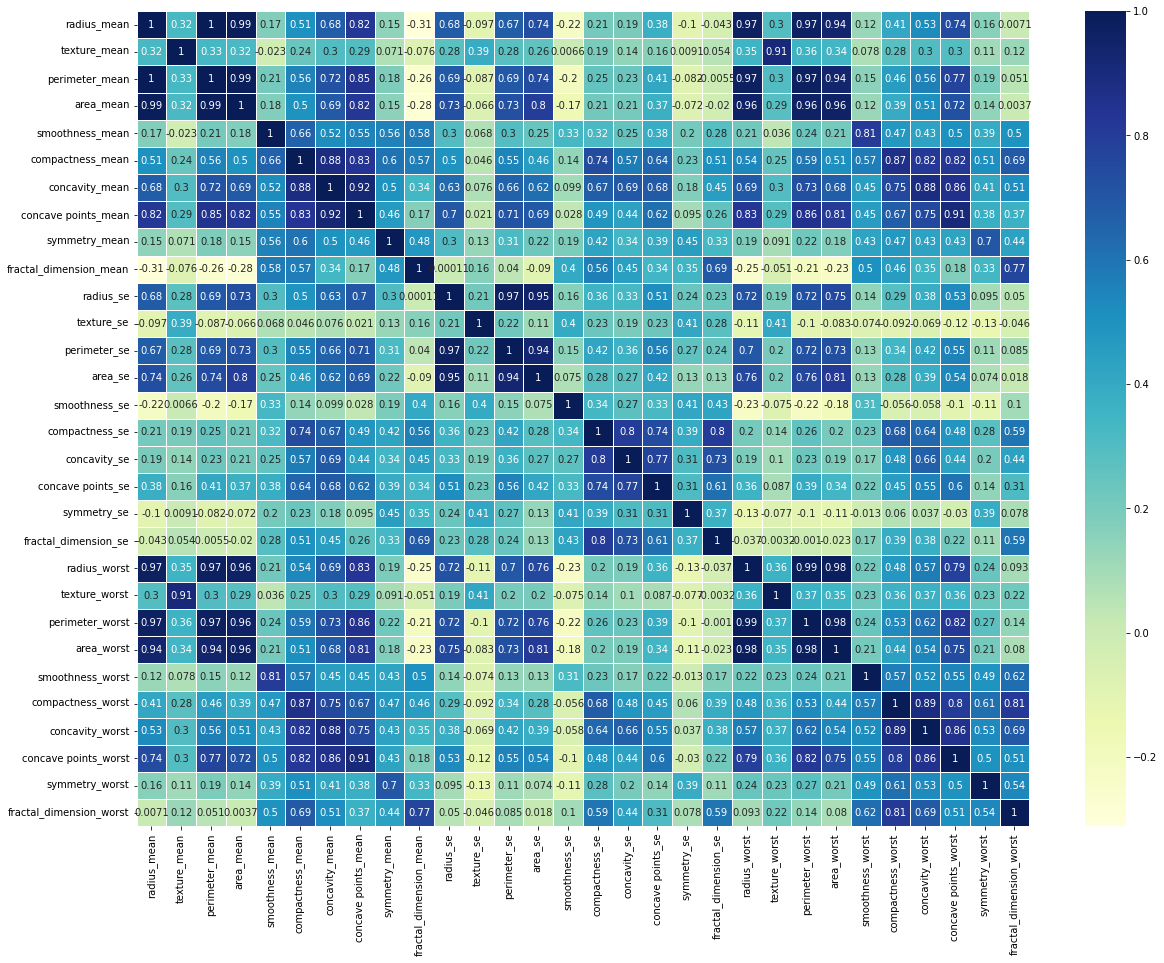

In [11]:
# correlation 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,linewidths=.5)
plt.show()

### Feature Engineering

In [12]:
df1['diagnosis']=df1.apply(lambda x:0 if x['diagnosis']=='M' else 1 , axis=1) # converting categorical into numerical form . since it is just binry output used 0 for M and 1 for B

In [13]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df1.diagnosis.dtype

dtype('int64')

In [15]:
# Transformtion
from sklearn.preprocessing import PowerTransformer
yeojohnTr = PowerTransformer(standardize=True)
for i in df.columns:
    df1[i]=yeojohnTr.fit_transform(df1[i].values.reshape(-1,1))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [16]:
## scaling
s= MinMaxScaler()
df1=pd.DataFrame(s.fit_transform(df1))
df1.columns=df.columns
df1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.747299,0.046701,0.772944,0.0,0.709664,0.943875,0.931423,0.926537,0.821907,0.848371,0.904983,0.356000,0.875353,0.876561,0.555049,0.814643,0.682502,0.585630,0.793247,0.772044,0.852934,0.231262,0.879387,0.0,0.698073,0.886763,0.819862,0.947632,0.839369,0.816728
1,0.0,0.829199,0.428532,0.818333,0.0,0.400678,0.425554,0.515874,0.668701,0.553689,0.324283,0.695860,0.266946,0.634739,0.763562,0.454783,0.323540,0.332235,0.521924,0.347561,0.521333,0.845519,0.435358,0.811003,0.0,0.447129,0.421436,0.436636,0.753279,0.485582,0.590497
2,0.0,0.803072,0.556982,0.805833,0.0,0.637861,0.740216,0.809929,0.885037,0.681710,0.446715,0.807611,0.296208,0.727950,0.804905,0.535438,0.743525,0.561395,0.687550,0.646102,0.641769,0.816741,0.496551,0.791440,0.0,0.588433,0.734439,0.652509,0.898020,0.690022,0.574628
3,0.0,0.427091,0.526919,0.473383,0.0,0.879472,0.950360,0.873073,0.819797,0.880956,1.000000,0.658489,0.461990,0.639346,0.531369,0.722202,0.928450,0.700959,0.649046,0.979311,0.901516,0.544509,0.523200,0.546370,0.0,0.943890,0.957318,0.807139,0.930557,1.000000,0.968123
4,0.0,0.821070,0.275258,0.827552,0.0,0.555435,0.658590,0.810936,0.816768,0.552048,0.406362,0.812354,0.293194,0.774234,0.805617,0.816931,0.553084,0.702630,0.652831,0.497257,0.692178,0.793921,0.205832,0.790476,0.0,0.542246,0.455671,0.609084,0.684650,0.360256,0.434792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.856661,0.594591,0.855091,0.0,0.649672,0.597290,0.876086,0.910110,0.505150,0.306379,0.918459,0.498027,0.853324,0.880946,0.774366,0.617029,0.670711,0.756742,0.206789,0.607018,0.854243,0.520490,0.832126,0.0,0.566226,0.466884,0.618692,0.846986,0.241579,0.344781
565,0.0,0.816349,0.762163,0.811054,0.0,0.532050,0.545823,0.699119,0.794144,0.520153,0.268429,0.815662,0.775435,0.762717,0.813310,0.503760,0.546944,0.572184,0.607208,0.545491,0.361147,0.819288,0.796031,0.799360,0.0,0.393715,0.432097,0.531334,0.685563,0.430956,0.257246
566,0.0,0.695520,0.757809,0.697241,0.0,0.398647,0.541020,0.537862,0.562420,0.421741,0.316603,0.623597,0.430397,0.637397,0.678117,0.515138,0.716826,0.636876,0.578301,0.313814,0.567078,0.698944,0.709021,0.694988,0.0,0.373111,0.613248,0.551200,0.619185,0.305704,0.455487
567,0.0,0.830060,0.789231,0.847707,0.0,0.704948,0.943241,0.966201,0.935531,0.814084,0.712216,0.799263,0.600534,0.789267,0.790401,0.564431,0.882970,0.778558,0.603951,0.664255,0.771535,0.859604,0.819290,0.879387,0.0,0.714358,0.957810,0.913796,0.946778,0.770339,0.841005


In [17]:
df1.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Feature Selection 

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df1.drop(labels=['diagnosis'], axis=1),
    df1['diagnosis'],
    test_size=0.2,
    random_state=41)

In [19]:
# removing highly correlated features
correlated_features = set()
correlation_matrix = df1.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [20]:
print(correlated_features)

{'texture_worst', 'smoothness_worst', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concavity_mean', 'concavity_worst', 'concavity_se', 'concave points_se', 'perimeter_mean', 'compactness_se', 'concave points_worst', 'perimeter_se', 'fractal_dimension_se', 'compactness_worst', 'area_se'}


In [21]:
x_train.drop(labels=correlated_features, axis=1, inplace=True)
x_test.drop(labels=correlated_features, axis=1, inplace=True)

In [22]:
x_train.shape

(455, 14)

In [23]:
from sklearn.metrics import roc_auc_score

### SVM Model Building

In [24]:
def svm(x_train, x_test, y_train, y_test):
    clf = SVC(kernel='linear') 
    clf.fit(x_train, y_train) 
    pred1=clf.predict(x_train)
    print('################### Train Score #################')
    print('Accuracy Score :',accuracy_score(pred1, y_train)) 
    print('Roc-Auc Score :',roc_auc_score(pred1, y_train),'\n')
    
    pred=clf.predict(x_test)
    print('################### Test Score #################')
    print('Accuracy Score :',accuracy_score(pred, y_test)) 
    print('Roc-Auc Score :',roc_auc_score(y_test,pred),'\n')
    
    print('################### Classification Report #################',)
    print(classification_report(pred, y_test))

In [25]:
svm(x_train, x_test, y_train, y_test)

################### Train Score #################
Accuracy Score : 0.9538461538461539
Roc-Auc Score : 0.9559101605176906 

################### Test Score #################
Accuracy Score : 0.9824561403508771
Roc-Auc Score : 0.9807432432432431 

################### Classification Report #################
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        40
         1.0       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [26]:
x_train.columns

Index(['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se', 'area_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Random Forest  

In [27]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(x_train,x_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators= 20, min_samples_split= 6, min_samples_leaf= 3, max_features= 'sqrt', max_depth= 90, bootstrap= True)
    rf.fit(x_train,y_train)
    
    
    pred1=rf.predict(x_train)
    print('################### Train Score #################')
    print('Accuracy Score :',accuracy_score(pred1, y_train)) 
    print('Roc-Auc Score :',roc_auc_score(pred1, y_train),'\n')
    
    pred=rf.predict(x_test)
    print('################### Test Score #################')
    print('Accuracy Score :',accuracy_score(pred, y_test)) 
    print('Roc-Auc Score :',roc_auc_score(y_test,pred),'\n')
    
    print('################### Classification Report #################',)
    print(classification_report(pred, y_test))

random_forest(x_train,x_test,y_train,y_test)

################### Train Score #################
Accuracy Score : 0.9846153846153847
Roc-Auc Score : 0.9853415814954277 

################### Test Score #################
Accuracy Score : 0.9649122807017544
Roc-Auc Score : 0.9557432432432432 

################### Classification Report #################
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        38
         1.0       0.99      0.96      0.97        76

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [28]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(x_train,x_test,y_train,y_test):
    rf=LogisticRegression(solver='liblinear',penalty='l2')
    rf.fit(x_train,y_train)
    
    
    pred1=rf.predict(x_train)
    print('################### Train Score #################')
    print('Accuracy Score :',accuracy_score(pred1, y_train)) 
    print('Roc-Auc Score :',roc_auc_score(pred1, y_train),'\n')
    
    pred=rf.predict(x_test)
    print('################### Test Score #################')
    print('Accuracy Score :',accuracy_score(pred, y_test)) 
    print('Roc-Auc Score :',roc_auc_score(y_test,pred),'\n')
    
    print('################### Classification Report #################',)
    print(classification_report(pred, y_test))

logistic_regression(x_train,x_test,y_train,y_test)

################### Train Score #################
Accuracy Score : 0.9340659340659341
Roc-Auc Score : 0.9350061096363712 

################### Test Score #################
Accuracy Score : 0.956140350877193
Roc-Auc Score : 0.9489864864864865 

################### Classification Report #################
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        39
         1.0       0.97      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

